In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from joblib import dump

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score

In [2]:
heart_data=pd.read_csv("Heart_Disease_Prediction.csv")
type(heart_data)

pandas.core.frame.DataFrame

In [3]:
heart_data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [4]:
heart_data.value_counts("Heart Disease")

Heart Disease
Absence     150
Presence    120
Name: count, dtype: int64

In [5]:
#LABEL ENCODING THE STRING VALUES TO NUMERIC
encoder=LabelEncoder()

In [6]:
heart_data['Heart Disease']=encoder.fit_transform(heart_data['Heart Disease'])

In [7]:
heart_data.head()

# 1 -> PRESENCE
# 0 -> ABSENCE

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


<Axes: >

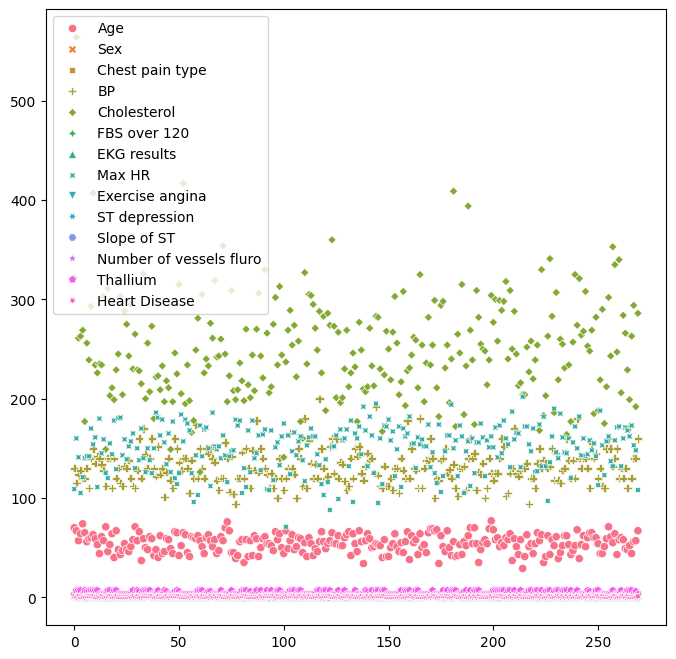

In [8]:
plt.figure(figsize=(8,8))
sns.scatterplot(heart_data)

<Axes: xlabel='Age', ylabel='Heart Disease'>

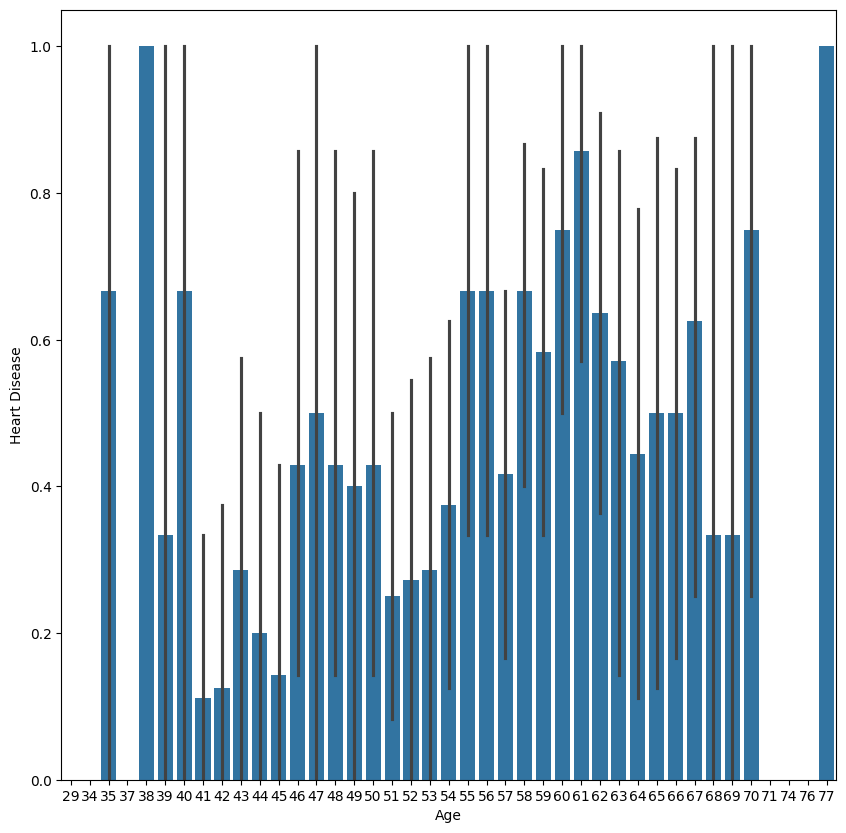

In [9]:
plt.figure(figsize=(10,10))
sns.barplot(x='Age', y='Heart Disease', data=heart_data)

<Axes: xlabel='Chest pain type', ylabel='count'>

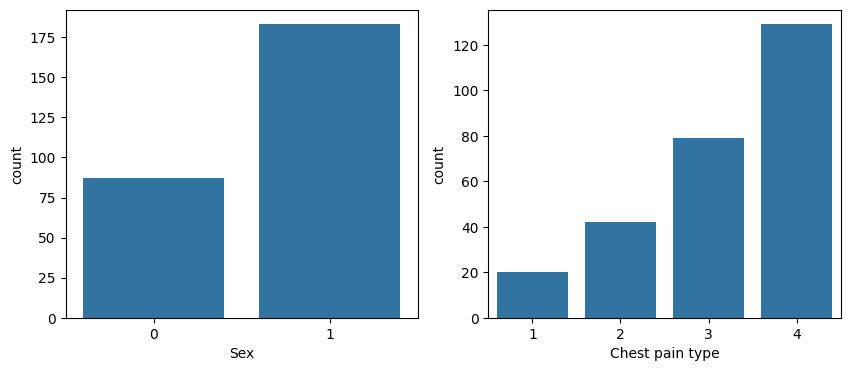

In [10]:
fig,axes=plt.subplots(1, 2, figsize=(10,4))

sns.countplot(x='Sex',data=heart_data,ax=axes[0])
sns.countplot(x='Chest pain type',data=heart_data,ax=axes[1])


**SPLITTING THE DATA**

In [11]:
X=heart_data.drop(columns='Heart Disease',axis=1)
Y=heart_data['Heart Disease']

In [12]:
X.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3


In [13]:
Y.head()

0    1
1    0
2    1
3    0
4    0
Name: Heart Disease, dtype: int32

In [14]:
Y.value_counts()

Heart Disease
0    150
1    120
Name: count, dtype: int64

**STANDARDIZATION OF DATA**

In [15]:
scaler=StandardScaler()

In [16]:
X=scaler.fit_transform(X)

In [17]:
print(X.std())

1.0


**TRAIN TEST SPLIT**

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=42, stratify=Y)


In [19]:
print(X_train.shape, X_test.shape)

(216, 13) (54, 13)


In [20]:
print(X_train.std(),X_test.std())

0.9907825174523183 1.0347586442384984


In [21]:
Y_train.value_counts()

Heart Disease
0    120
1     96
Name: count, dtype: int64

In [22]:
Y_test.value_counts()

Heart Disease
0    30
1    24
Name: count, dtype: int64

**IMPORTING MODELS AND CHECKING ACCURACY**

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [24]:
heart_log=LogisticRegression()
heart_svc=SVC()
heart_xgb=XGBClassifier()

In [25]:
print(cross_val_score(heart_log,X,Y,cv=5).mean())
print(cross_val_score(heart_svc,X,Y,cv=5).mean())
print(cross_val_score(heart_xgb,X,Y,cv=5).mean())


0.8407407407407407
0.8296296296296296
0.7814814814814814


In [28]:
#SINCE LOGISTIC REGRESSION HAD THE HIGHEST CROSS VALIDATION SCORE WE WILL USE IT
heart_svc.fit(X_train,Y_train)

SVC()

In [29]:
print(accuracy_score(Y_train,heart_svc.predict(X_train)))

0.9259259259259259


In [30]:
print(accuracy_score(Y_test,heart_svc.predict(X_test)))

0.8148148148148148


In [31]:
print(accuracy_score(Y,heart_svc.predict(X)))

0.9037037037037037


**MAKING A PREDICTIVE SYSTEM**

In [32]:
feature_names=['Age','Sex','Chest pain type','BP','Cholesterol','FBS over 120','EKG results','Max HR','Exercise angina','ST depression','Slope of ST','Number of vessels fluro','Thallium']

In [33]:
inp_dat=(58,1,4,150,270,0,2,111,1,0.8,1,0,7)
check_arr=np.array(inp_dat)
check_arr=check_arr.reshape(1,-1)
check_df=pd.DataFrame([inp_dat],columns=feature_names)
check_final=scaler.transform(check_df)

In [35]:
if(heart_svc.predict(check_final)[0]==0):
    print("Person isn't suffering from heart disease.")
else:
    print("Person is suffering from heart disease.")

Person is suffering from heart disease.


In [36]:
dump(heart_svc,'heart_model.joblib')

['heart_model.joblib']